<a href="https://colab.research.google.com/github/m-mohsin-zafar/bt-classification-dipa/blob/master/tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Connection

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Pre Installations

In [2]:
!apt-get install graphviz libgraphviz-dev pkg-config python-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libpython-all-dev libxdot4 python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
Suggested packages:
  gvfs python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gno

In [3]:
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/" 

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 122kB 3.4MB/s 
Skipping bdist_wheel for pygraphviz, due to binaries being disabled for it.
  Running setup.py install for pygraphviz ... done


# **Imports Section**

All the requisite imports for the project are as under

In [0]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
from skimage.feature import greycomatrix, greycoprops
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder
from skimage import img_as_int

# Paths & Names
All paths and filenames to be used in the project are initialized under

In [0]:
PROJECT_DIRECTORY = os.path.join(os.getcwd(), 'gdrive', 'My Drive','dipa_project')
IMAGE_DIRECTORY_LIST = ['L1', 'L3', 'L2']
PATIENTS_FILENAME = 'patients_data.csv'
GLCM_PROPS_FILENAME = 'glcm_features.csv'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# GLCM Properties Calculation
In this section for each image GLCM properties are calculated, images are downsampled and dataframes for further processing are prepared

In [6]:
ANGLES = [0., np.pi / 4., np.pi / 2., 3. * np.pi / 4.]
DISTANCES = [1]
properties = ["correlation", "contrast", "homogeneity", "energy"]

glcm_properties_list = []
img_list = []

patients_df = pd.read_csv(os.path.join(PROJECT_DIRECTORY, PATIENTS_FILENAME))

for directory in IMAGE_DIRECTORY_LIST:

    path = os.path.join(PROJECT_DIRECTORY, directory)

    for file in os.listdir(path):
        filename = os.fsdecode(file)
        if filename.endswith(".BMP"):
            print(filename)
            file_path = os.path.join(path, filename)
            filename_without_extension = os.path.splitext(filename)[0]

            img = mpimg.imread(file_path)
            img = np.array(img)

            if img.shape == (512, 512):
                
                image_resized = resize(img, (img.shape[0] / 2, img.shape[1] / 2),
                       anti_aliasing=True)        
                image_resized = image_resized * 255
              
                glcm = greycomatrix(image_resized.astype(np.uint8), distances=DISTANCES, angles=ANGLES, levels=256, symmetric=True, normed=True)
                glcm_props = [np.mean(greycoprops(glcm, properties[i])) for i in range(len(properties))]
                print(glcm_props)
                patient_info = patients_df[patients_df.filename == int(filename_without_extension)]

                # Uncomment the Line Below to Save Images as Normalized
                # img = img / 255              
                
                img_list.append(image_resized)
                glcm_properties_list.append([int(filename_without_extension), patient_info.patient_id.item(),
                                            glcm_props[0], glcm_props[1],
                                             glcm_props[2], glcm_props[3], patient_info.tumor_label.item()])
            else:
                print("File: ", filename, "has size != (512,512)")
                continue

        else:
            continue

            
glcm_props_columns = ['filename', 'patient_id', 'correlation',
                      'contrast', 'homogeneity', 'energy', 'tumor_label']
glcm_props_df = pd.DataFrame(glcm_properties_list)
glcm_props_df.to_csv(os.path.join(PROJECT_DIRECTORY,GLCM_PROPS_FILENAME), header=glcm_props_columns, index=False)

1.BMP


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[0.9644627766566027, 150.80328626609958, 0.6186262681267838, 0.3333623643354726]
10.BMP
[0.9618334758547966, 102.5871269163303, 0.6885450692020391, 0.31132059553282354]
102.BMP
[0.9645326710418638, 128.8945358155517, 0.5792239839057816, 0.3174885281447758]
101.BMP
[0.9629613798931149, 159.83174788542863, 0.5736778823435522, 0.31484766667023023]
100.BMP
[0.9621007626316906, 146.22268490484436, 0.5652193072074221, 0.3089332720125608]
103.BMP
[0.9612447250197498, 112.47592485462323, 0.6075169243435761, 0.32028798659366586]
106.BMP
[0.9667906825219964, 116.63824811971352, 0.6413211374179256, 0.3240511367804559]
104.BMP
[0.9551482606603747, 160.39374492382734, 0.6279386976858974, 0.3213278974826694]
107.BMP
[0.9751918367917701, 111.70977169237793, 0.6400295138765096, 0.31343161728448676]
105.BMP
[0.95891600553028, 135.19637248894657, 0.6304529794862466, 0.32196311537975253]
111.BMP
[0.9590929233997596, 190.69064085928494, 0.5725801771927714, 0.3037714550822632]
110.BMP
[0.9903473499012407, 

In [0]:
glcm_props_df = pd.read_csv(os.path.join(PROJECT_DIRECTORY,GLCM_PROPS_FILENAME))

imgs_dic = {'image' : img_list}
images_df = pd.DataFrame(imgs_dic)

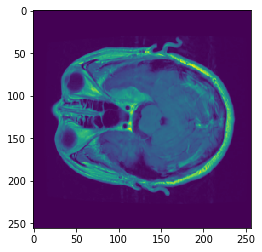

In [8]:
plt.imshow(images_df['image'][4])

In [9]:
images_df['image'].shape

(3049,)

In [10]:
glcm_props_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,tumor_label
0,1,100360,0.964463,150.803286,0.618626,0.333362,1
1,10,101016,0.961833,102.587127,0.688545,0.311321,1
2,102,107494,0.964533,128.894536,0.579224,0.317489,1
3,101,107494,0.962961,159.831748,0.573678,0.314848,1
4,100,107494,0.962101,146.222685,0.565219,0.308933,1


In [11]:
merged_df = pd.concat([glcm_props_df, images_df], axis=1)
merged_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,tumor_label,image
0,1,100360,0.964463,150.803286,0.618626,0.333362,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,10,101016,0.961833,102.587127,0.688545,0.311321,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,102,107494,0.964533,128.894536,0.579224,0.317489,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,101,107494,0.962961,159.831748,0.573678,0.314848,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,100,107494,0.962101,146.222685,0.565219,0.308933,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [12]:
# Get the DataFrame column names as a list
clist = list(merged_df.columns)

# Rearrange list the way you like 
clist_new = clist[0:6]+[clist[7]]+[clist[6]]
clist_new

['filename',
 'patient_id',
 'correlation',
 'contrast',
 'homogeneity',
 'energy',
 'image',
 'tumor_label']

In [13]:
# Pass the new list to the DataFrame - like a key list in a dict 
merged_df = merged_df[clist_new]
merged_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,image,tumor_label
0,1,100360,0.964463,150.803286,0.618626,0.333362,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,10,101016,0.961833,102.587127,0.688545,0.311321,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,102,107494,0.964533,128.894536,0.579224,0.317489,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,101,107494,0.962961,159.831748,0.573678,0.314848,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,100,107494,0.962101,146.222685,0.565219,0.308933,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [16]:
merged_df.groupby('tumor_label').describe()

filename                           ...    energy                    
               count         mean         std  ...       50%       75%       max
tumor_label                                    ...                              
1              708.0   366.758475  269.039934  ...  0.204596  0.300089  0.499200
2             1426.0  2215.126227  662.691965  ...  0.264507  0.344755  0.443214
3              915.0  1377.859016  273.957876  ...  0.092076  0.126184  0.335983

[3 rows x 40 columns]

In [18]:
X_data = merged_df.drop(['tumor_label'], axis=1)
X_data.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,image
0,1,100360,0.964463,150.803286,0.618626,0.333362,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,10,101016,0.961833,102.587127,0.688545,0.311321,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,102,107494,0.964533,128.894536,0.579224,0.317489,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,101,107494,0.962961,159.831748,0.573678,0.314848,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,100,107494,0.962101,146.222685,0.565219,0.308933,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [19]:
y_data = merged_df['tumor_label']
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: tumor_label, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, stratify=y_data, test_size=0.4, random_state=67)

In [21]:
X_train.shape

(1829, 7)

In [22]:
X_test.shape

(1220, 7)

In [83]:
# 1829/31 = 59
1829/609

3.0032840722495897

In [0]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [24]:
train_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,image,tumor_label
608,644,114018,0.960656,190.895279,0.389004,0.102134,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5,...",1
447,504,103925,0.954693,163.209852,0.411676,0.105855,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1709,2149,MR038469,0.955742,121.375474,0.688883,0.367289,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
1755,2189,MR037458C,0.949389,141.985060,0.650445,0.365568,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
713,1002,112649,0.942148,238.132464,0.406585,0.140638,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


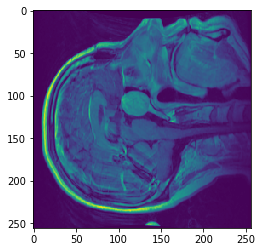

In [25]:
plt.imshow(train_df['image'].iloc[9])

# Data Pre Processing

In [26]:
# Extracting Properties' Columns
train_props_df = train_df.iloc[:, 2:6]
test_props_df = test_df.iloc[:, 2:6]

train_props_df.head()

,correlation,contrast,homogeneity,energy
608,0.960656,190.895279,0.389004,0.102134
447,0.954693,163.209852,0.411676,0.105855
1709,0.955742,121.375474,0.688883,0.367289
1755,0.949389,141.985060,0.650445,0.365568
713,0.942148,238.132464,0.406585,0.140638


In [0]:
# # Normalizing Each Property
# train_props_normed = normalize(train_props_df, norm='l1')
# test_props_normed = normalize(test_props_df, norm='l1')

# # Creating Copies of Train and Test DFs for future Usage
# train_df_c = train_df.copy()
# test_df_c = test_df.copy()

# # Updating Values
# train_df_c[['correlation', 'contrast', 'homogeneity', 'energy']] = train_props_normed
# test_df_c[['correlation', 'contrast', 'homogeneity', 'energy']] = test_props_normed

In [0]:
# Applying Standardization

scalar = StandardScaler()

train_props_standardized = scalar.fit_transform(train_props_df)
test_props_standardized = scalar.transform(test_props_df)

# Updating Values
train_df[['correlation', 'contrast', 'homogeneity', 'energy']] = train_props_standardized
test_df[['correlation', 'contrast', 'homogeneity', 'energy']] = test_props_standardized

In [29]:
test_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,image,tumor_label
2158,2590,MR052550,-1.000298,-1.369083,0.747802,0.480687,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
2699,784,112105,0.936111,-0.578043,0.414033,0.066714,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
2110,2547,MR051586,0.036536,0.084250,0.967395,1.010159,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
1419,1639,99223,-0.167404,1.109982,-1.129137,-1.026774,"[[0.0, 0.0, 0.250000000000028, 1.5000000000000...",3
2838,1848,MR048294,0.235634,-0.775155,1.464958,1.511337,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2


In [30]:
train_df.head()

,filename,patient_id,correlation,contrast,homogeneity,energy,image,tumor_label
608,644,114018,0.393875,1.050076,-0.876866,-0.999089,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5,...",1
447,504,103925,0.012664,0.439912,-0.693555,-0.963693,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1709,2149,MR038469,0.079701,-0.482085,1.547712,1.523422,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
1755,2189,MR037458C,-0.326464,-0.027866,1.236934,1.507049,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
713,1002,112649,-0.789405,2.091147,-0.734722,-0.632786,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3


In [0]:
def stack_props_as_channels(df):
  # Stacking Prop Values as Channel to Original Image
  correlation_appended_imgs = []
  contrast_appended_imgs = []
  homogeneity_appended_imgs = []
  energy_appended_imgs = []

  for (f, img, corr, cont, hom, ene) in zip(df['filename'], df['image'], df['correlation'],
                                            df['contrast'], df['homogeneity'], df['energy']):
      img = img / 255
      correlation_appended_imgs.append(np.dstack((img, (corr * np.ones((256, 256))))))
      contrast_appended_imgs.append(np.dstack((img, (cont * np.ones((256, 256))))))
      homogeneity_appended_imgs.append(np.dstack((img, (hom * np.ones((256, 256))))))
      energy_appended_imgs.append(np.dstack((img, (ene * np.ones((256, 256))))))
      print(f)
      
  return correlation_appended_imgs, contrast_appended_imgs, homogeneity_appended_imgs, energy_appended_imgs

In [0]:
# train_corr_imgs, train_cont_imgs, train_homo_imgs, train_ene_imgs = stack_props_as_channels(train_df_c)
# test_corr_imgs, test_cont_imgs, test_homo_imgs, test_ene_imgs = stack_props_as_channels(test_df_c)

# Deep Learning Application

In [0]:
# develop an NN for glcm features dataset

from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, concatenate
from matplotlib import pyplot

In [42]:
# Extracting Properties' Columns
X_train_props_df = train_df.iloc[:, 2:6]
X_test_props_df = test_df.iloc[:, 2:6]
y_train = train_df['tumor_label']
y_test = test_df['tumor_label']

X_train_props_df.shape

(1829, 4)

In [0]:
# Encode Labels to range 0 - n-1 classes
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [0]:
# one hot encode output variable
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [55]:
y_train.shape

(1829, 3)

In [130]:
X_train_props_df.shape[1:]

(4,)

In [175]:


# Using Functional API to build Model

# inputs = Input(shape=X_train_props_df.shape[1:])

# x = Dense(units=32, activation='relu')(inputs)
# x = Dense(units=8, activation='relu')(x)
# x = Dense(units=3, activation='relu')(x)
# predictions = Activation('softmax')(x)

# model = Model(inputs=inputs, outputs=predictions)

# define model using Sequential API
modelA = Sequential()
modelA.add(Dense(32, input_dim=4, activation='relu'))
modelA.add(Dense(8, activation="relu"))
modelA.add(Dense(3, activation='softmax'))
modelA.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
historyA = modelA.fit(X_train_props_df, y_train, validation_data=(X_test_props_df, y_test), epochs=30, batch_size=309)


Train on 1829 samples, validate on 1220 samples
Epoch 1/30
1829/1829 [==============================] - 1s 596us/step - loss: 1.1334 - acc: 0.3253 - val_loss: 1.1000 - val_acc: 0.3639
Epoch 2/30
1829/1829 [==============================] - 0s 18us/step - loss: 1.0827 - acc: 0.4319 - val_loss: 1.0522 - val_acc: 0.5008
Epoch 3/30
1829/1829 [==============================] - 0s 17us/step - loss: 1.0382 - acc: 0.5358 - val_loss: 1.0124 - val_acc: 0.5623
Epoch 4/30
1829/1829 [==============================] - 0s 17us/step - loss: 1.0025 - acc: 0.5910 - val_loss: 0.9820 - val_acc: 0.5959
Epoch 5/30
1829/1829 [==============================] - 0s 16us/step - loss: 0.9750 - acc: 0.6129 - val_loss: 0.9585 - val_acc: 0.6131
Epoch 6/30
1829/1829 [==============================] - 0s 16us/step - loss: 0.9533 - acc: 0.6184 - val_loss: 0.9385 - val_acc: 0.6221
Epoch 7/30
1829/1829 [==============================] - 0s 17us/step - loss: 0.9336 - acc: 0.6249 - val_loss: 0.9204 - val_acc: 0.6262
Epoch 

1220/1220 [==============================] - 0s 56us/step
Train: 0.716, Test: 0.704


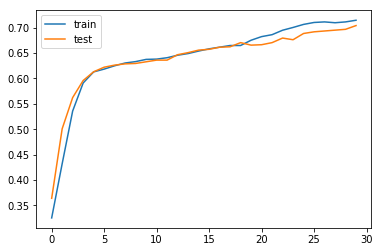

In [176]:
# evaluate the model
_, train_acc = modelA.evaluate(X_train_props_df, y_train)
_, test_acc = modelA.evaluate(X_test_props_df, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(historyA.history['acc'], label='train')
pyplot.plot(historyA.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [61]:
modelA.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [0]:
	# plot graph of modelA
	plot_model(modelA, show_shapes=True, to_file=os.path.join(PROJECT_DIRECTORY,'nn_graph_for_glcm_props.png'))

In [99]:
Xtr_imgs = [i.reshape(256, 256, 1) for i in train_df['image']]
Xtr_imgs = np.asarray(Xtr_imgs, dtype = np.float32)
Xtr_imgs.shape

(1829, 256, 256, 1)

In [100]:
Xts_imgs = [i.reshape(256, 256, 1) for i in test_df['image']]
Xts_imgs = np.asarray(Xts_imgs, dtype = np.float32)
Xts_imgs.shape

(1220, 256, 256, 1)

In [101]:
Xts_imgs.shape[1:]

(256, 256, 1)

In [0]:
img_inputs = Input(shape=Xts_imgs.shape[1:])

x = Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu', padding='same')(img_inputs)
# x = MaxPool2D(pool_size=(5, 5), strides=(2,2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
# x = Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), activation='relu')(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
# x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

modelB = Model(inputs=img_inputs, outputs=predictions)

In [118]:
modelB.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 127, 127, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 64)      36928     
__________

In [0]:
modelB.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [179]:
# fit model
historyB = modelB.fit(Xtr_imgs, y_train, validation_data=(Xts_imgs, y_test), epochs=15, batch_size=170)

Train on 1829 samples, validate on 1220 samples
Epoch 1/15
1829/1829 [==============================] - 13s 7ms/step - loss: 7.6456 - acc: 0.5090 - val_loss: 7.4920 - val_acc: 0.5344
Epoch 2/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.2573 - acc: 0.4877 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 3/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.5041 - acc: 0.4724 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 4/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.4776 - acc: 0.4740 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 5/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.5393 - acc: 0.4702 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 6/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.5570 - acc: 0.4691 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 7/15
1829/1829 [==============================] - 11s 6ms/step - loss: 8.5481 - acc: 0.4697 - val_loss: 8.5743 - val_acc: 0.4680
Epoch 8

1220/1220 [==============================] - 2s 2ms/step
Train: 0.418, Test: 0.410


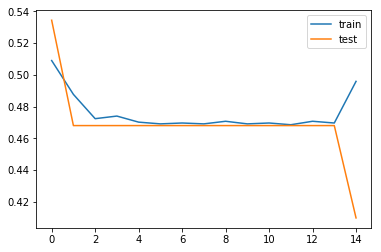

In [180]:
# evaluate the model
_, train_acc = modelB.evaluate(Xtr_imgs, y_train)
_, test_acc = modelB.evaluate(Xts_imgs, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(historyB.history['acc'], label='train')
pyplot.plot(historyB.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

# Combination of Neural Networks

In [0]:
def create_mlp(dim, classification=False):
  # define our MLP network
  model = Sequential()
  model.add(Dense(input_dim=dim, units=32, activation="relu"))
  model.add(Dense(units=8, activation="relu"))

  # check to see if the classification node should be added
  if classification:
    model.add(Dense(units=3, activation="softmax"))

  # return our model
  return model

In [0]:
def create_cnn(width, height, depth, filters=(16, 32, 32), classification=False):
  # initialize the input shape and channel dimension, assuming
  # TensorFlow/channels-last ordering
  inputShape = (height, width, depth)
  chanDim = -1

  # define the model input
  inputs = Input(shape=inputShape)

  # loop over the number of filters
  for (i, f) in enumerate(filters):
    # if this is the first CONV layer then set the input
    # appropriately
    if i == 0:
      x = inputs

    # CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
  
  # flatten the volume, then FC => RELU => BN => DROPOUT
  x = Flatten()(x)
  x = Dense(16)(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Dropout(0.5)(x)

  # apply another FC layer, this one to match the number of nodes
  # coming out of the MLP
  x = Dense(8)(x)
  x = Activation("relu")(x)

  # check to see if the classification node should be added
  if classification:
    x = Dense(3, activation="softmax")(x)

  # construct the CNN
  model = Model(inputs, x)

  # return the CNN
  return model

In [0]:
# create the MLP and CNN models
mlp = create_mlp(X_train_props_df.shape[1], classification=False)
cnn = create_cnn(256, 256, 1, classification=False)

In [149]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 264       
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________


In [150]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 256, 16)      160       
_________________________________________________________________
activation_4 (Activation)    (None, 256, 256, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
activation_5 (Activation)    (None, 128, 128, 32)      0         
__________

In [0]:
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])

In [0]:
# our final FC layer head will have two dense layers, the final one
# being our classification head
x = Dense(8, activation="relu")(combinedInput)
x = Dense(3, activation="softmax")(x)

In [0]:
modelC = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [156]:
modelC.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 256, 256, 16) 160         input_9[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 256, 256, 16) 0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 256, 256, 16) 64          activation_4[0][0]               
__________________________________________________________________________________________________
max_poolin

In [0]:
modelC.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [188]:
# fit model
historyC = modelC.fit([X_train_props_df, Xtr_imgs], y_train, validation_data=([X_test_props_df, Xts_imgs], y_test), epochs=10, batch_size=170)

Train on 1829 samples, validate on 1220 samples
Epoch 1/10
1829/1829 [==============================] - 6s 3ms/step - loss: 1.0467 - acc: 0.4576 - val_loss: 0.9519 - val_acc: 0.5516
Epoch 2/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.8351 - acc: 0.6665 - val_loss: 0.7984 - val_acc: 0.6770
Epoch 3/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.7123 - acc: 0.7562 - val_loss: 0.6893 - val_acc: 0.7361
Epoch 4/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.6014 - acc: 0.8070 - val_loss: 0.5446 - val_acc: 0.7992
Epoch 5/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.4747 - acc: 0.8622 - val_loss: 0.4155 - val_acc: 0.8623
Epoch 6/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.3871 - acc: 0.8912 - val_loss: 0.3467 - val_acc: 0.8836
Epoch 7/10
1829/1829 [==============================] - 4s 2ms/step - loss: 0.3116 - acc: 0.9213 - val_loss: 0.3441 - val_acc: 0.8582
Epoch 8/10
182

1220/1220 [==============================] - 1s 626us/step
Train: 0.981, Test: 0.911


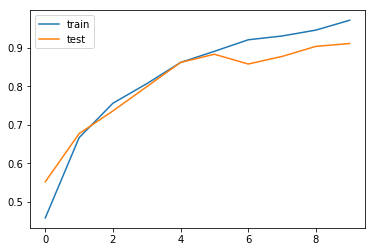

In [189]:
# evaluate the model
_, train_acc = modelC.evaluate([X_train_props_df,Xtr_imgs], y_train)
_, test_acc = modelC.evaluate([X_test_props_df, Xts_imgs], y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(historyC.history['acc'], label='train')
pyplot.plot(historyC.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
	# plot graph of modelA
	plot_model(modelC, show_shapes=True, to_file=os.path.join(PROJECT_DIRECTORY,'final_model.png'))

# Experimentations

In [190]:
cnn_exp = create_cnn(256, 256, 1, classification=True)
cnn_exp.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
cnn_exp_history = cnn_exp.fit(Xtr_imgs, y_train, validation_data=(Xts_imgs, y_test), epochs=10, batch_size=170)

Train on 1829 samples, validate on 1220 samples
Epoch 1/10
1829/1829 [==============================] - 6s 3ms/step - loss: 1.2765 - acc: 0.4112 - val_loss: 1.0866 - val_acc: 0.5869
Epoch 2/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.9672 - acc: 0.5664 - val_loss: 0.7836 - val_acc: 0.6434
Epoch 3/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.7696 - acc: 0.6648 - val_loss: 0.5607 - val_acc: 0.8164
Epoch 4/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6352 - acc: 0.7485 - val_loss: 0.4891 - val_acc: 0.8656
Epoch 5/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.4989 - acc: 0.8311 - val_loss: 0.4674 - val_acc: 0.8713
Epoch 6/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.4058 - acc: 0.8857 - val_loss: 0.4276 - val_acc: 0.8648
Epoch 7/10
1829/1829 [==============================] - 3s 2ms/step - loss: 0.3350 - acc: 0.9136 - val_loss: 0.4016 - val_acc: 0.8664
Epoch 8/10
182

1220/1220 [==============================] - 1s 658us/step
Train: 0.968, Test: 0.893


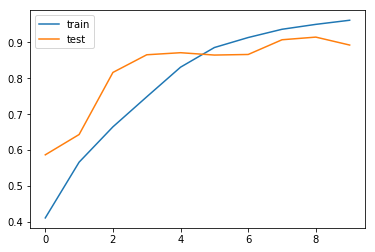

In [191]:
# evaluate the model
_, train_acc = cnn_exp.evaluate(Xtr_imgs, y_train)
_, test_acc = cnn_exp.evaluate(Xts_imgs, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(cnn_exp_history.history['acc'], label='train')
pyplot.plot(cnn_exp_history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [193]:
grouped_df = merged_df.groupby("tumor_label")
train_grouped_df = train_df.groupby('tumor_label')
test_grouped_df = test_df.groupby('tumor_label')

# We have a total of 9 different Classes, so 3 groups will be made
per_class_count = []
for i in range(0, 3):
    per_class_count.append([('C-' + str(i + 1)), grouped_df.get_group(i + 1).shape[0],
                            train_grouped_df.get_group(i + 1).shape[0],
                            test_grouped_df.get_group(i + 1).shape[0]])

# Conversion to an array
per_class_count_df = pd.DataFrame(np.array(per_class_count), columns=['class', 'original', 'train', 'test'])
per_class_count_df[["original", "train", "test"]] = per_class_count_df[["original", "train", "test"]].apply(
    pd.to_numeric)
per_class_count_df.sort_values(by=['original'])



,class,original,train,test
0,C-1,708,425,283
2,C-3,915,549,366
1,C-2,1426,855,571


In [0]:
import random

n = 3
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

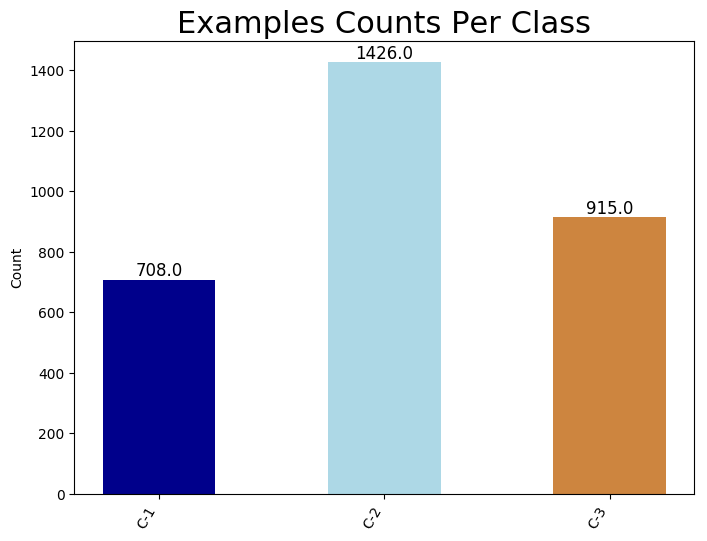

In [200]:
# Plot Bars
plt.figure(figsize=(8, 6), dpi=100)
plt.bar(per_class_count_df['class'], per_class_count_df['original'], color=c, width=.5)
for i, val in enumerate(per_class_count_df['original'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom',
             fontdict={'fontweight': 500, 'size': 12})

# Decoration
plt.gca().set_xticklabels(per_class_count_df['class'], rotation=60, horizontalalignment='right')
plt.title("Examples Counts Per Class", fontsize=22)
plt.ylabel('Count')
plt.ylim()
plt.show()

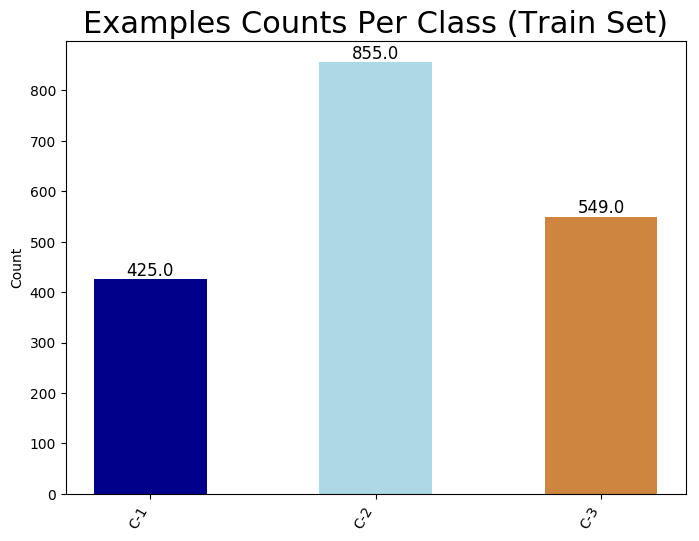

In [201]:
 # Plot Bars
    plt.figure(figsize=(8, 6), dpi=100)
    plt.bar(per_class_count_df['class'], per_class_count_df['train'], color=c, width=.5)
    for i, val in enumerate(per_class_count_df['train'].values):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom',
                 fontdict={'fontweight': 500, 'size': 12})

    # Decoration
    plt.gca().set_xticklabels(per_class_count_df['class'], rotation=60, horizontalalignment='right')
    plt.title("Examples Counts Per Class (Train Set)", fontsize=22)
    plt.ylabel('Count')
    plt.ylim()
    plt.show()

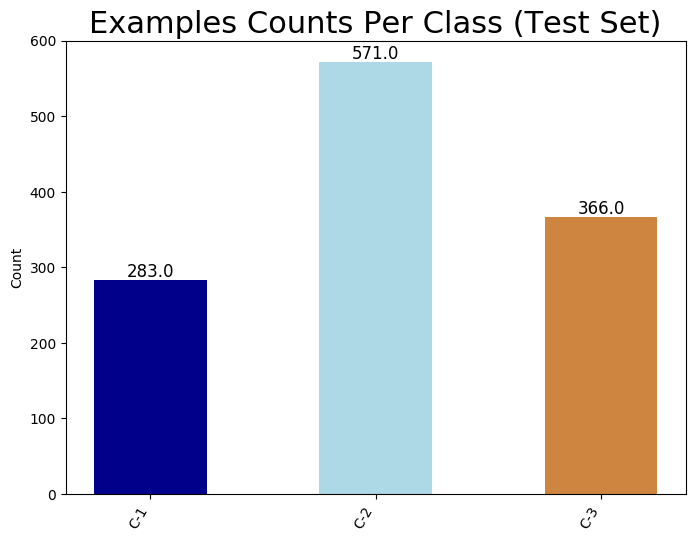

In [202]:
# Plot Bars
    plt.figure(figsize=(8, 6), dpi=100)
    plt.bar(per_class_count_df['class'], per_class_count_df['test'], color=c, width=.5)
    for i, val in enumerate(per_class_count_df['test'].values):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom',
                 fontdict={'fontweight': 500, 'size': 12})

    # Decoration
    plt.gca().set_xticklabels(per_class_count_df['class'], rotation=60, horizontalalignment='right')
    plt.title("Examples Counts Per Class (Test Set)", fontsize=22)
    plt.ylabel('Count')
    plt.ylim()
    plt.show()